Imports


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
##import pandasProfiling as pp

1. leer el dataset

In [18]:
#Read dataset
motor_stock = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS2xYo-awUaesdgZ6YoOPg3MJvdDCE1liVK0YzeKMkvkGUsftUja9lShR_qJQfZE7N2C5G5r1Hh0pUx/pub?gid=391234979&single=true&output=csv')
print("\nDataset:\n")
motor_stock.head()


Dataset:



,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


2. Limpieza de datos

In [19]:
motor_stock_transformed = motor_stock.drop(['car_ID', 'CarName'], axis=1)
motor_stock_transformed = motor_stock_transformed.replace('?', np.nan)
motor_stock_transformed.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


3. Normalización de datos

In [20]:
motor_stock_transformed = pd.get_dummies(motor_stock_transformed, columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',], dtype=float, drop_first=True)
motor_stock_transformed.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


4. coorrección de datos


Correlation matrix:

                       symboling  wheelbase  carlength  carwidth  carheight  \
symboling               1.000000  -0.532155  -0.356996 -0.230600  -0.544638   
wheelbase              -0.532155   1.000000   0.874660  0.796302   0.590611   
carlength              -0.356996   0.874660   1.000000  0.841603   0.492942   
carwidth               -0.230600   0.796302   0.841603  1.000000   0.283389   
carheight              -0.544638   0.590611   0.492942  0.283389   1.000000   
curbweight             -0.225294   0.777584   0.878366  0.866450   0.299936   
enginesize             -0.105585   0.569304   0.683404  0.736568   0.067575   
boreratio              -0.132810   0.489874   0.608662  0.564479   0.168940   
stroke                 -0.007226   0.160769   0.128872  0.181313  -0.053798   
compressionratio       -0.181606   0.250663   0.160016  0.185428   0.259181   
horsepower              0.075994   0.354195   0.553162  0.638769  -0.104531   
peakrpm                 0.2769

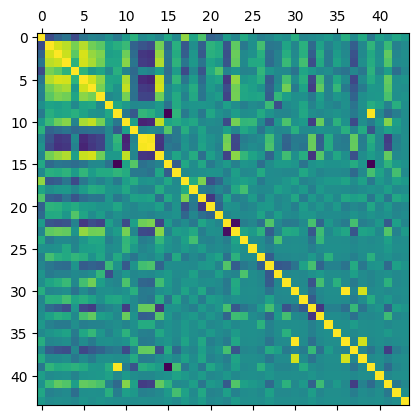

In [21]:
corr = motor_stock_transformed.corr()

## Correlation matrix
print("\nCorrelation matrix:\n")
print(corr)

##grafica la matriz de correlacion
plt.matshow(corr)
plt.show()

5. Análisis exploratorio de datos


Analisis de correlacion:

price              1.000000
enginesize         0.874597
curbweight         0.835161
horsepower         0.808786
carwidth           0.758929
carlength          0.682713
drivewheel_rwd     0.642569
wheelbase          0.577957
boreratio          0.556454
fuelsystem_mpfi    0.515924
Name: price, dtype: float64 


Grafica de correlacion:



<AxesSubplot:>

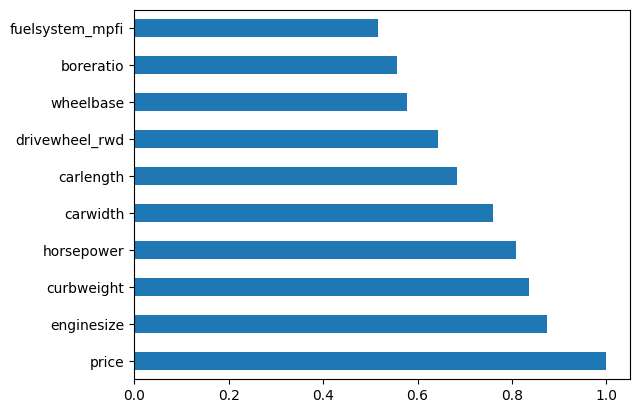

In [22]:
##hacer analisis de correlacion
print("\nAnalisis de correlacion:\n")
print(corr['price'].sort_values(ascending=False)[:10], '\n')

##grafica de correlacion
print("\nGrafica de correlacion:\n")
corr['price'].sort_values(ascending=False)[:10].plot(kind='barh')



6.  Separar eje **X** y eje **Y**

In [23]:
y = motor_stock_transformed['price']
x = motor_stock_transformed.drop(['price'], axis=1)

##feature selection
print("\nFeature selection:\n")
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
best = SelectKBest(score_func=f_regression, k=5)
fit = best.fit(x, y)
features = fit.transform(x)
print(features[0:5,:])


Feature selection:

[[6.410e+01 2.548e+03 1.300e+02 1.110e+02 1.000e+00]
 [6.410e+01 2.548e+03 1.300e+02 1.110e+02 1.000e+00]
 [6.550e+01 2.823e+03 1.520e+02 1.540e+02 0.000e+00]
 [6.620e+01 2.337e+03 1.090e+02 1.020e+02 1.000e+00]
 [6.640e+01 2.824e+03 1.360e+02 1.150e+02 0.000e+00]]


7. Entrenamiento del modelo


Separacion de datos para entrenamiento y test:

(163, 43) (41, 43) (163,) (41,)

Entrenamiento del modelo con un arbol de decision:

DecisionTreeRegressor(max_depth=5, random_state=0)

Prediccion de los datos de test:

[ 6121.3        13493.19047619  6121.3         7746.89473684
 16395.90909091  7117.23333333 15768.33333333 13493.19047619
 20158.09090909  7746.89473684  8602.83333333 10096.81818182
 11469.9         7746.89473684  7746.89473684 20158.09090909
 13493.19047619 13493.19047619  6121.3        31180.
  7117.23333333 10096.81818182  8602.83333333 19159.5
 11469.9         7746.89473684  9639.          7746.89473684
  7746.89473684  7117.23333333 20158.09090909  8602.83333333
 34184.         20158.09090909  8602.83333333  7746.89473684
 34971.2         7117.23333333 13493.19047619  7746.89473684
 34971.2       ]

Evaluacion del modelo:

Mean squared error: 5683340.62
Coefficient of determination: 0.91

Grafica de los resultados:



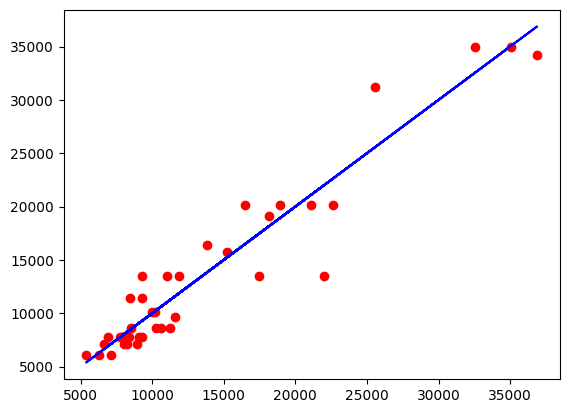

In [25]:
##separa el 80% de los datos para entrenamiento y el 20% para test

print("\nSeparacion de datos para entrenamiento y test:\n")
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


##entrenamiento del modelo con un arbol de decision
print("\nEntrenamiento del modelo con un arbol de decision:\n")
##regressor = DecisionTreeRegressor(random_state=0)
regressor = DecisionTreeRegressor(random_state=0, max_depth=5)
regressor.fit(x_train, y_train)
print(regressor)


##prediccion de los datos de test
print("\nPrediccion de los datos de test:\n")
y_pred = regressor.predict(x_test)
print(y_pred)

##evaluacion del modelo
print("\nEvaluacion del modelo:\n")

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

##grafica de los resultados
print("\nGrafica de los resultados:\n")
plt.scatter(y_test, y_pred, color='red')
plt.plot(y_test, y_test, color='blue')
plt.show()

